## Inspecting and cleaning the datasets

First, let's take a look at the data that we have been provided

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the 'Working Days' file
working_days = pd.ExcelFile('Exercise - Working Days calendar - FOR CANDIDATE-SENT - SHORT.xlsx')

In [3]:
#Taking a look at the sheets we have
working_days.sheet_names

['Weekdays', 'Calendar']

In [4]:
#Creating a dictionary (workingdays_df), that contains a dataframe for every sheet_name
workingdays_df = {sh:working_days.parse(sh) for sh in working_days.sheet_names}

In [5]:
#taking a look at the 'Weekdays'
weekdays = workingdays_df['Weekdays']
weekdays.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Memo: Working Days
2,NaN,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,NaN,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,NaN,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,NaN,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,NaN,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,NaN,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20
8,NaN,2015-06-06 00:00:00,5,5,4,4,4,4,4,30,22
9,NaN,2015-07-07 00:00:00,4,4,5,5,5,4,4,31,23


That is a very messy df. Let's try to clean it a little bit.

In [6]:
#let's take a look at the lenght of the df
len(weekdays)

41

In [7]:
#let's take a look at the info
weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
Unnamed: 0     0 non-null float64
Unnamed: 1     39 non-null object
Unnamed: 2     39 non-null object
Unnamed: 3     39 non-null object
Unnamed: 4     39 non-null object
Unnamed: 5     39 non-null object
Unnamed: 6     39 non-null object
Unnamed: 7     39 non-null object
Unnamed: 8     39 non-null object
Unnamed: 9     39 non-null object
Unnamed: 10    40 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ KB


In [8]:
#getting rid of the first column
del weekdays['Unnamed: 0']
weekdays.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Memo: Working Days
2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20


In [9]:
#dropping the first two rows
weekdays = weekdays.iloc[2:]
weekdays.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22


In [10]:
#getting the right headers
new_header = weekdays.iloc[0] 
weekdays = weekdays[1:] 
weekdays.columns = new_header
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,Country 1
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20


In [11]:
#finding a more descriptive name for the last column
weekdays = weekdays.rename(columns={'Country 1': 'working_days'})
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20


In [12]:
weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 3 to 40
Data columns (total 10 columns):
Month-Year        38 non-null object
#Mon              38 non-null object
#Tue              38 non-null object
#Wed              38 non-null object
#Thu              38 non-null object
#Fri              38 non-null object
#Sat              38 non-null object
#Sun              38 non-null object
Total Weekdays    38 non-null object
working_days      38 non-null object
dtypes: object(10)
memory usage: 3.1+ KB


In [13]:
#let's now convert the numeric values 
weekdays.columns

Index(['Month-Year', '#Mon', '#Tue', '#Wed', '#Thu', '#Fri', '#Sat', '#Sun',
       'Total Weekdays', 'working_days'],
      dtype='object', name=2)

In [14]:
int_columns = ['#Mon', '#Tue', '#Wed', '#Thu', '#Fri', '#Sat', '#Sun',
       'Total Weekdays', 'working_days']
weekdays[int_columns] = weekdays[int_columns].apply(pd.to_numeric, errors='coerce')

In [15]:
weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 3 to 40
Data columns (total 10 columns):
Month-Year        38 non-null object
#Mon              38 non-null int64
#Tue              38 non-null int64
#Wed              38 non-null int64
#Thu              38 non-null int64
#Fri              38 non-null int64
#Sat              38 non-null int64
#Sun              38 non-null int64
Total Weekdays    38 non-null int64
working_days      38 non-null int64
dtypes: int64(9), object(1)
memory usage: 3.1+ KB


Taking a look at the second sheet

In [16]:
#taking a look at the second sheet
calendar = workingdays_df['Calendar']

In [17]:
calendar.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Holiday is marked as 0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Date,Month-Year,Day,Year,Month,Month,Day,Country 1
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1
8,Jan2015,2015-01-06 00:00:00,2015-01-06 00:00:00,Tuesday,2015,01,Jan,06,1
9,Jan2015,2015-01-07 00:00:00,2015-01-07 00:00:00,Wednesday,2015,01,Jan,07,1


In [18]:
len(calendar)

1158

In [19]:
#Let's clean this one up aswell
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 9 columns):
Unnamed: 0                1155 non-null object
Unnamed: 1                1156 non-null object
Unnamed: 2                1156 non-null object
Unnamed: 3                1156 non-null object
Unnamed: 4                1156 non-null object
Unnamed: 5                1156 non-null object
Unnamed: 6                1156 non-null object
Unnamed: 7                1156 non-null object
Holiday is marked as 0    1156 non-null object
dtypes: object(9)
memory usage: 81.5+ KB


In [20]:
#dropping the first two rows
calendar = calendar.iloc[2:]
calendar.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Holiday is marked as 0
2,NaN,Date,Month-Year,Day,Year,Month,Month,Day,Country 1
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0


In [21]:
#getting the right headers
new_header = calendar.iloc[0] 
calendar = calendar[1:] 
calendar.columns = new_header
calendar.head()

2,nan,Date,Month-Year,Day,Year,Month,Month,Day,Country 1
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1


In [22]:
#finding a more descriptive name for the first and last column
calendar = calendar.rename(columns={calendar.columns[0]: 'str_month_year', 'Country 1': 'Holiday_is_0'})
calendar.head()

2,str_month_year,Date,Month-Year,Day,Year,Month,Month,Day,Holiday_is_0
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1


Moving on to the next file

In [23]:
#reading the daily sales file
daily_sales = pd.read_csv('Exercise - Daily Sales - FOR CANDIDATE-SENT - SHORT.csv')

In [24]:
len(daily_sales)

634

In [25]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 4 columns):
Country         634 non-null object
Posting Date    634 non-null object
Brand           634 non-null object
Daily Sales     634 non-null object
dtypes: object(4)
memory usage: 19.9+ KB


In [26]:
daily_sales.head()

,Country,Posting Date,Brand,Daily Sales
0,Country 1,02.01.2015,Brand A,"30,785.22"
1,Country 1,05.01.2015,Brand A,"18,256.02"
2,Country 1,06.01.2015,Brand A,"24,168.04"
3,Country 1,07.01.2015,Brand A,"3,858.65"
4,Country 1,12.01.2015,Brand A,"1,229.33"


In [27]:
daily_sales['Daily Sales'] = daily_sales['Daily Sales'].str.replace(',', '').astype(float)

In [28]:
daily_sales.describe()

,Daily Sales
count,634.000000
mean,15933.469432
std,14196.766542
min,-9693.270000
25%,352.012500
50%,15609.850000
75%,25639.130000
max,84258.830000


In [29]:
daily_sales.head()

,Country,Posting Date,Brand,Daily Sales
0,Country 1,02.01.2015,Brand A,30785.22
1,Country 1,05.01.2015,Brand A,18256.02
2,Country 1,06.01.2015,Brand A,24168.04
3,Country 1,07.01.2015,Brand A,3858.65
4,Country 1,12.01.2015,Brand A,1229.33


In [30]:
lo_actual_long = pd.read_excel('Exercise - ACT and LO Monthly - FOR CANDIDATE-SENT - SHORT.xlsx')

In [31]:
lo_actual_long.head()

,Submission,Year,Month,Country 1 - Brand A
0,Actual,2015,1,224134.6
1,Actual,2015,2,184817.6
2,Actual,2015,3,249555.0
3,Actual,2015,4,245542.0
4,Actual,2015,5,221473.8


In [32]:
lo_actual_long.tail()

,Submission,Year,Month,Country 1 - Brand A
67,LO Oct 17 Total,2017,10,344131.8520
68,LO Nov 17 Total,2017,11,306463.6720
69,LO Dec 17 Total,2017,12,301781.6840
70,LO Jan 18 Total,2018,1,325117.1786
71,LO Feb 18 Total,2018,2,217738.2980


In [33]:
lo_actual_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
Submission             72 non-null object
Year                   72 non-null int64
Month                  72 non-null int64
Country 1 - Brand A    72 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [34]:
#changing the format of the df to a wider format
lo_actual_wide = lo_actual_long
lo_actual_wide['Submission_short'] = lo_actual_wide['Submission'].str.split().str[0]

In [35]:
lo_actual_wide.tail()

,Submission,Year,Month,Country 1 - Brand A,Submission_short
67,LO Oct 17 Total,2017,10,344131.8520,LO
68,LO Nov 17 Total,2017,11,306463.6720,LO
69,LO Dec 17 Total,2017,12,301781.6840,LO
70,LO Jan 18 Total,2018,1,325117.1786,LO
71,LO Feb 18 Total,2018,2,217738.2980,LO


In [36]:
lo_actual_wide = lo_actual_wide[['Year', 'Month', 'Country 1 - Brand A', 'Submission_short']]

In [37]:
lo_actual_wide = lo_actual_wide.pivot_table(values='Country 1 - Brand A', index=['Year', 'Month'], columns='Submission_short', aggfunc=np.sum)

In [38]:
lo_actual_wide.reset_index(inplace=True)

In [39]:
lo_actual_wide.head()

Submission_short,Year,Month,Actual,LO
0,2015,1,224134.6,224175.600000
1,2015,2,184817.6,198122.288255
2,2015,3,249555.0,255465.428000
3,2015,4,245542.0,232068.578168
4,2015,5,221473.8,216181.778528


In [40]:
#weekdays monthly data
#calendar daily data
#daily_sales daily data
#lo_actual_wide monthly data

In [41]:
#now thatwe cleanish dataframes, let's try to join them to investigate the data


In [42]:
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20


In [43]:
lo_actual_wide.head()

Submission_short,Year,Month,Actual,LO
0,2015,1,224134.6,224175.600000
1,2015,2,184817.6,198122.288255
2,2015,3,249555.0,255465.428000
3,2015,4,245542.0,232068.578168
4,2015,5,221473.8,216181.778528


In [44]:
#making a column that can be used to join tables for weekdays
weekdays['month_year'] = pd.to_datetime(weekdays['Month-Year'], format = '%Y%m%d').apply(lambda x: x.strftime('%Y-%m-%d'))

In [45]:
weekdays['month_year'] = weekdays['month_year'].str.replace('-', '').str[0:6]

In [46]:
weekdays.head()

2,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year
3,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21,201501
4,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201502
5,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22,201503
6,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22,201504
7,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20,201505


In [47]:
#making a column that can be used to join tables for lo_actual_wide
lo_actual_wide['Month_02'] = lo_actual_wide['Month'].map('{:02}'.format)
lo_actual_wide['month_year'] = lo_actual_wide['Year'].apply(str) + lo_actual_wide['Month_02']
del lo_actual_wide['Month_02']

In [48]:
lo_actual_wide.head()

Submission_short,Year,Month,Actual,LO,month_year
0,2015,1,224134.6,224175.600000,201501
1,2015,2,184817.6,198122.288255,201502
2,2015,3,249555.0,255465.428000,201503
3,2015,4,245542.0,232068.578168,201504
4,2015,5,221473.8,216181.778528,201505


In [49]:
#making two columns that can be used to join tables for calendar
#let's rename the columns since some of them have the same name
calendar.columns = ['str_month_year', 'Date', 'Month-Year', 'Day_str', 'Year', 'Month_int', 'Month_str',
       'Day_int', 'Holiday_is_0']

#column to join with monthly dataframes
calendar['month_year'] = pd.to_datetime(calendar['Month-Year'], format = '%Y%m%d').apply(lambda x: x.strftime('%Y-%m-%d')).str.replace('-', '').str[0:6]

#column to join with daily dataframes
calendar['day_month_year'] = pd.to_datetime(calendar['Date'], format = '%d%m%Y').apply(lambda x: x.strftime('%d%m%Y'))

In [50]:
calendar.head()

,str_month_year,Date,Month-Year,Day_str,Year,Month_int,Month_str,Day_int,Holiday_is_0,month_year,day_month_year
3,Jan2015,2015-01-01 00:00:00,2015-01-01 00:00:00,Thursday,2015,01,Jan,01,0,201501,01012015
4,Jan2015,2015-01-02 00:00:00,2015-01-02 00:00:00,Friday,2015,01,Jan,02,1,201501,02012015
5,Jan2015,2015-01-03 00:00:00,2015-01-03 00:00:00,Saturday,2015,01,Jan,03,0,201501,03012015
6,Jan2015,2015-01-04 00:00:00,2015-01-04 00:00:00,Sunday,2015,01,Jan,04,0,201501,04012015
7,Jan2015,2015-01-05 00:00:00,2015-01-05 00:00:00,Monday,2015,01,Jan,05,1,201501,05012015


In [51]:
#making two columns that can be used to join tables for daily_sales
#column to join with monthly dataframes
daily_sales['month_year'] = daily_sales['Posting Date'].str.replace('.', '').str.slice(-4, 10) + daily_sales['Posting Date'].str.replace('.', '').str.slice(2, 4)

#column to join with daily dataframes
daily_sales['day_month_year'] = daily_sales['Posting Date'].str.replace('.', '')

In [52]:
daily_sales.head()

,Country,Posting Date,Brand,Daily Sales,month_year,day_month_year
0,Country 1,02.01.2015,Brand A,30785.22,201501,02012015
1,Country 1,05.01.2015,Brand A,18256.02,201501,05012015
2,Country 1,06.01.2015,Brand A,24168.04,201501,06012015
3,Country 1,07.01.2015,Brand A,3858.65,201501,07012015
4,Country 1,12.01.2015,Brand A,1229.33,201501,12012015


Joining the dfs

In [53]:
#monthly data merge
monthly_data = pd.merge(weekdays, lo_actual_wide, on='month_year')
monthly_data.head()

,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year,Year,Month,Actual,LO
0,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21,201501,2015,1,224134.6,224175.600000
1,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201502,2015,2,184817.6,198122.288255
2,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22,201503,2015,3,249555.0,255465.428000
3,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22,201504,2015,4,245542.0,232068.578168
4,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20,201505,2015,5,221473.8,216181.778528


In [54]:
monthly_data.tail()

,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year,Year,Month,Actual,LO
33,2017-10-10 00:00:00,5,5,4,4,4,4,5,31,22,201710,2017,10,328168.2,344131.8520
34,2017-11-11 00:00:00,4,4,5,5,4,4,4,30,20,201711,2017,11,NaN,306463.6720
35,2017-12-12 00:00:00,4,4,4,4,5,5,5,31,20,201712,2017,12,NaN,301781.6840
36,2018-01-01 00:00:00,5,5,5,4,4,4,4,31,22,201801,2018,1,NaN,325117.1786
37,2018-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201802,2018,2,NaN,217738.2980


In [55]:
#daily data merge
daily_data = pd.merge(calendar, daily_sales, on='day_month_year', how='outer').fillna(0)
daily_data.head(15)

,str_month_year,Date,Month-Year,Day_str,Year,Month_int,Month_str,Day_int,Holiday_is_0,month_year_x,day_month_year,Country,Posting Date,Brand,Daily Sales,month_year_y
0,Jan2015,2015-01-01,2015-01-01,Thursday,2015,01,Jan,01,0,201501,01012015,0,0,0,0.00,0
1,Jan2015,2015-01-02,2015-01-02,Friday,2015,01,Jan,02,1,201501,02012015,Country 1,02.01.2015,Brand A,30785.22,201501
2,Jan2015,2015-01-03,2015-01-03,Saturday,2015,01,Jan,03,0,201501,03012015,0,0,0,0.00,0
3,Jan2015,2015-01-04,2015-01-04,Sunday,2015,01,Jan,04,0,201501,04012015,0,0,0,0.00,0
4,Jan2015,2015-01-05,2015-01-05,Monday,2015,01,Jan,05,1,201501,05012015,Country 1,05.01.2015,Brand A,18256.02,201501
5,Jan2015,2015-01-06,2015-01-06,Tuesday,2015,01,Jan,06,1,201501,06012015,Country 1,06.01.2015,Brand A,24168.04,201501
6,Jan2015,2015-01-07,2015-01-07,Wednesday,2015,01,Jan,07,1,201501,07012015,Country 1,07.01.2015,Brand A,3858.65,201501
7,Jan2015,2015-01-08,2015-01-08,Thursday,2015,01,Jan,08,1,201501,08012015,0,0,0,0.00,0
8,Jan2015,2015-01-09,2015-01-09,Friday,2015,01,Jan,09,1,201501,09012015,0,0,0,0.00,0
9,Jan2015,2015-01-10,2015-01-10,Saturday,2015,01,Jan,10,0,201501,10012015,0,0,0,0.00,0


In [56]:
del daily_data['Posting Date']
del daily_data['month_year_y']

In [57]:
daily_data.loc[daily_data['Country'] == 0, 'Country'] = 'Country 1'
daily_data.loc[daily_data['Brand'] == 0, 'Brand'] = 'Brand A'

In [58]:
daily_data.head()

,str_month_year,Date,Month-Year,Day_str,Year,Month_int,Month_str,Day_int,Holiday_is_0,month_year_x,day_month_year,Country,Brand,Daily Sales
0,Jan2015,2015-01-01,2015-01-01,Thursday,2015,01,Jan,01,0,201501,01012015,Country 1,Brand A,0.00
1,Jan2015,2015-01-02,2015-01-02,Friday,2015,01,Jan,02,1,201501,02012015,Country 1,Brand A,30785.22
2,Jan2015,2015-01-03,2015-01-03,Saturday,2015,01,Jan,03,0,201501,03012015,Country 1,Brand A,0.00
3,Jan2015,2015-01-04,2015-01-04,Sunday,2015,01,Jan,04,0,201501,04012015,Country 1,Brand A,0.00
4,Jan2015,2015-01-05,2015-01-05,Monday,2015,01,Jan,05,1,201501,05012015,Country 1,Brand A,18256.02


Drawing the first graphs to get some insights

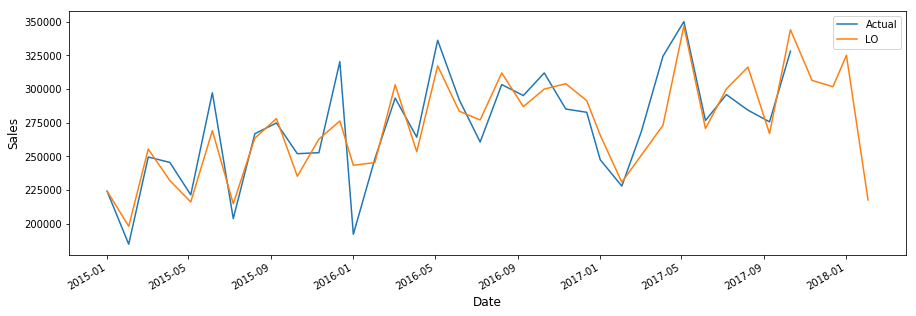

In [59]:
#Actual and LO evolution
m = monthly_data.plot(x='Month-Year', y=['Actual', 'LO'], figsize=(15, 5), legend=True)
m.set_xlabel("Date", fontsize=12)
m.set_ylabel("Sales", fontsize=12)
plt.show()

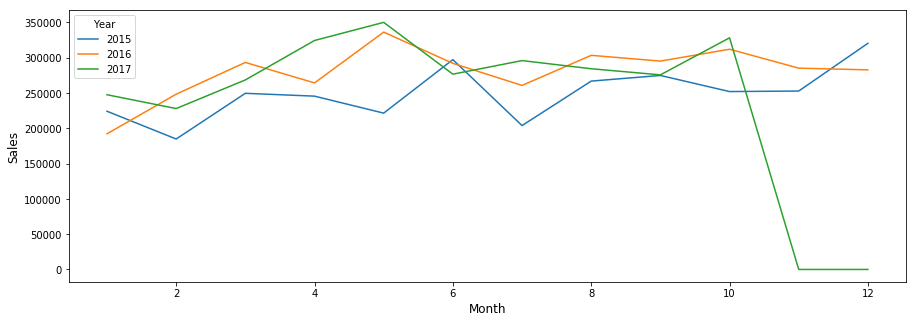

In [60]:
#year over year representation of Actual Sales
year_columns = monthly_data[['Year', 'Month', 'Actual']]
year_columns = year_columns.pivot_table(values='Actual', index='Month', columns='Year', aggfunc=np.sum).reset_index()

y = year_columns.plot(x='Month', y=[2015, 2016, 2017], figsize=(15, 5), legend=True)
y.set_xlabel("Month", fontsize=12)
y.set_ylabel("Sales", fontsize=12)
plt.show()

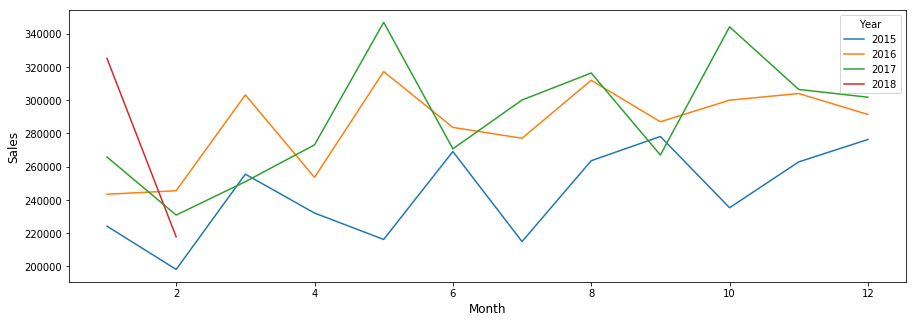

In [61]:
#year over year representation of LO
year_columns_lo = monthly_data[['Year', 'Month', 'LO']]
year_columns_lo = year_columns_lo.pivot_table(values='LO', index='Month', columns='Year', aggfunc=np.sum).reset_index()

y = year_columns_lo.plot(x='Month', y=[2015, 2016, 2017, 2018], figsize=(15, 5), legend=True)
y.set_xlabel("Month", fontsize=12)
y.set_ylabel("Sales", fontsize=12)
plt.show()

We can see that, in general the sales grew in 2016 vs 2015 but they where pretty similar in 2017 vs 2016 (some months above, some below). The prediction (LO), predicted more or less the same thing.

Text(0, 0.5, 'Sales')

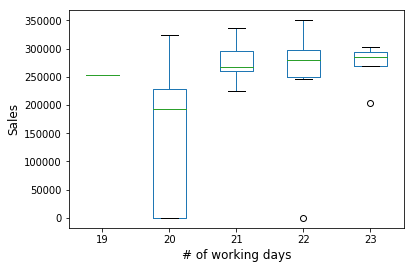

In [62]:
#does the number of working days affect the sales amount?
number_wdays = monthly_data.pivot_table(values='Actual', index='Month-Year', columns='working_days', aggfunc=np.sum)

ax = number_wdays.plot.box()
ax.set_xlabel("# of working days", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)

In [63]:
monthly_data[['working_days', 'LO']].groupby('working_days').count()

,LO
working_days,
19,1
20,9
21,9
22,14
23,5


It doesn't seem to be very obvious, but it could be taken into consideration specially for the shorter months (20 or less days). The problem here is that we have a small sample to prove this

Text(0, 0.5, 'Sales')

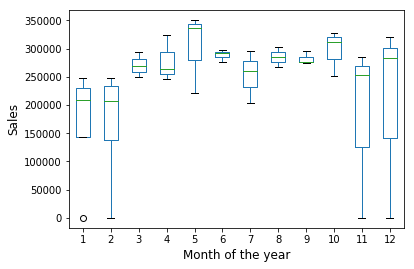

In [64]:
#does the month of the year affect the sales amount?
month_year = monthly_data.pivot_table(values='Actual', index='Month-Year', columns='Month', aggfunc=np.sum)

ax = month_year.plot.box()
ax.set_xlabel("Month of the year", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)

In [65]:
monthly_data[['Month', 'LO']].groupby('Month').count()

,LO
Month,
1,4
2,4
3,3
4,3
5,3
6,3
7,3
8,3
9,3


It seems like the sales are more stable from year to year from march until october. But the sample is not bigh enough to conclude this.

In [66]:
daily_data.head()

,str_month_year,Date,Month-Year,Day_str,Year,Month_int,Month_str,Day_int,Holiday_is_0,month_year_x,day_month_year,Country,Brand,Daily Sales
0,Jan2015,2015-01-01,2015-01-01,Thursday,2015,01,Jan,01,0,201501,01012015,Country 1,Brand A,0.00
1,Jan2015,2015-01-02,2015-01-02,Friday,2015,01,Jan,02,1,201501,02012015,Country 1,Brand A,30785.22
2,Jan2015,2015-01-03,2015-01-03,Saturday,2015,01,Jan,03,0,201501,03012015,Country 1,Brand A,0.00
3,Jan2015,2015-01-04,2015-01-04,Sunday,2015,01,Jan,04,0,201501,04012015,Country 1,Brand A,0.00
4,Jan2015,2015-01-05,2015-01-05,Monday,2015,01,Jan,05,1,201501,05012015,Country 1,Brand A,18256.02


In [67]:
#does the day of the week affect the sales amount?
#first let's get rid of the holiday days since the amount for those days will be 0 and we don't want it to affect the inspeciton
daily_data[['Holiday_is_0', 'Day_str', 'Daily Sales']].groupby('Holiday_is_0').count()

,Day_str,Daily Sales
Holiday_is_0,,
0,344,344
1,811,811


In [68]:
day_week = daily_data[['Holiday_is_0', 'Day_str', 'Daily Sales', 'day_month_year']]
day_week = day_week[day_week['Holiday_is_0']==1]
len(day_week)

811

Text(0, 0.5, 'Sales')

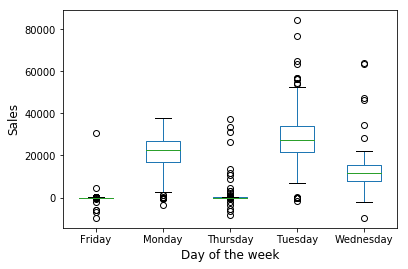

In [69]:
day_week = day_week.pivot_table(values='Daily Sales', index='day_month_year', columns='Day_str', aggfunc=np.sum)

dw = day_week.plot.box()
dw.set_xlabel("Day of the week", fontsize=12)
dw.set_ylabel("Sales", fontsize=12)

In [70]:
daily_data[daily_data['Holiday_is_0'] == 1][['Day_str', 'Date']].groupby('Day_str').count()

,Date
Day_str,
Friday,160
Monday,160
Thursday,161
Tuesday,165
Wednesday,165


It seems like for some reason Fridays and Thursdays seem to have lower sales than the rest of the days. It looks like enough to further investigate.

Text(0, 0.5, 'Occurances')

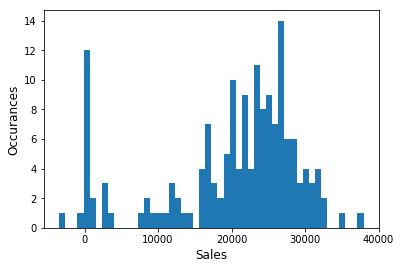

In [71]:
#plotting a histogram for Monday sales
dm = day_week['Monday'].plot.hist(bins=50)
dm.set_xlabel("Sales", fontsize=12)
dm.set_ylabel("Occurances", fontsize=12)

Text(0, 0.5, 'Occurances')

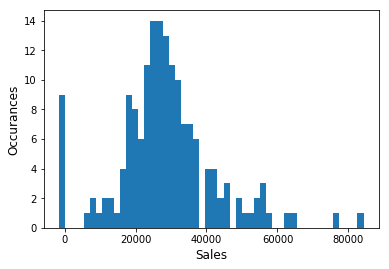

In [72]:
#plotting a histogram for Tuesday sales
dt = day_week['Tuesday'].plot.hist(bins=50)
dt.set_xlabel("Sales", fontsize=12)
dt.set_ylabel("Occurances", fontsize=12)

Text(0, 0.5, 'Occurances')

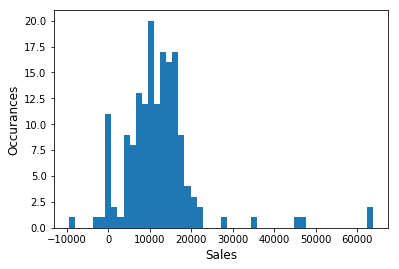

In [73]:
#plotting a histogram for Wednesday sales
dw = day_week['Wednesday'].plot.hist(bins=50)
dw.set_xlabel("Sales", fontsize=12)
dw.set_ylabel("Occurances", fontsize=12)

Text(0, 0.5, 'Occurances')

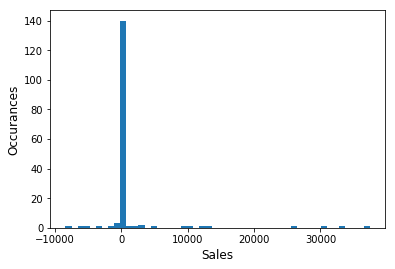

In [74]:
#plotting a histogram for Thursday sales
dth = day_week['Thursday'].plot.hist(bins=50)
dth.set_xlabel("Sales", fontsize=12)
dth.set_ylabel("Occurances", fontsize=12)

Text(0, 0.5, 'Occurances')

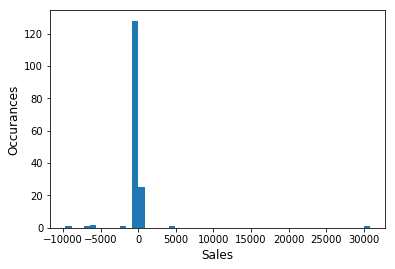

In [75]:
#plotting a histogram for Friday sales
df = day_week['Friday'].plot.hist(bins=50)
df.set_xlabel("Sales", fontsize=12)
df.set_ylabel("Occurances", fontsize=12)

We can see that the sales at the end of the week tend to be around 0 (with some minor exceptions), but this could be very relevant in the sales prediction depending on how many Thursdays and Fridays are left in the month

Let's now look at precision of the LO vs Actual Sales.

In [76]:
actual_vs_lo = monthly_data[['month_year', 'Actual', 'LO']]
actual_vs_lo['predict_error'] = ((actual_vs_lo['Actual'] - actual_vs_lo['LO'])/actual_vs_lo['Actual'])*100

actual_vs_lo.head()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month_year,Actual,LO,predict_error
0,201501,224134.6,224175.600000,-0.018293
1,201502,184817.6,198122.288255,-7.198821
2,201503,249555.0,255465.428000,-2.368387
3,201504,245542.0,232068.578168,5.487217
4,201505,221473.8,216181.778528,2.389457


Text(0, 0.5, 'Occurances')

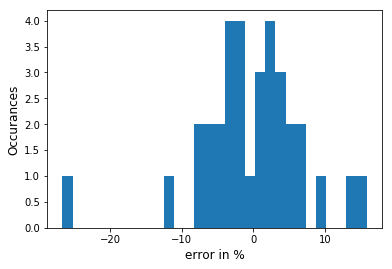

In [77]:
#plotting a histogram of the errors
he = actual_vs_lo['predict_error'].plot.hist(bins=30)
he.set_xlabel("error in %", fontsize=12)
he.set_ylabel("Occurances", fontsize=12)

In [78]:
actual_vs_lo[(actual_vs_lo['predict_error'] >= 10) | (actual_vs_lo['predict_error'] <= -10)]

,month_year,Actual,LO,predict_error
11,201512,320404.4,276344.678,13.751285
12,201601,192173.2,243402.600,-26.657931
27,201704,324388.0,273092.874,15.812893
31,201708,284361.4,316353.680,-11.250571


So we can see that most of the times (30 out of 34) LO is +/-10% or less of the actual prediction which is quite good and can be used as a reference.

Let's now begin with some forecasting models. We will start with a "dumb" one to set the bar. What this forecast will do is calculate the average sales in the past working days in the month and project them for the next n working of that same month.

In [140]:
daily_data.head()

,str_month_year,Date,Month-Year,Day_str,Year,Month_int,Month_str,Day_int,Holiday_is_0,month_year_x,day_month_year,Country,Brand,Daily Sales
0,Jan2015,2015-01-01,2015-01-01,Thursday,2015,01,Jan,01,0,201501,01012015,Country 1,Brand A,0.00
1,Jan2015,2015-01-02,2015-01-02,Friday,2015,01,Jan,02,1,201501,02012015,Country 1,Brand A,30785.22
2,Jan2015,2015-01-03,2015-01-03,Saturday,2015,01,Jan,03,0,201501,03012015,Country 1,Brand A,0.00
3,Jan2015,2015-01-04,2015-01-04,Sunday,2015,01,Jan,04,0,201501,04012015,Country 1,Brand A,0.00
4,Jan2015,2015-01-05,2015-01-05,Monday,2015,01,Jan,05,1,201501,05012015,Country 1,Brand A,18256.02


In [141]:
monthly_data.head()

,Month-Year,#Mon,#Tue,#Wed,#Thu,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year,Year,Month,Actual,LO
0,2015-01-01 00:00:00,4,4,4,5,5,5,4,31,21,201501,2015,1,224134.6,224175.600000
1,2015-02-02 00:00:00,4,4,4,4,4,4,4,28,20,201502,2015,2,184817.6,198122.288255
2,2015-03-03 00:00:00,5,5,4,4,4,4,5,31,22,201503,2015,3,249555.0,255465.428000
3,2015-04-04 00:00:00,4,4,5,5,4,4,4,30,22,201504,2015,4,245542.0,232068.578168
4,2015-05-05 00:00:00,4,4,4,4,5,5,5,31,20,201505,2015,5,221473.8,216181.778528


In [142]:
all_data = pd.merge(daily_data, monthly_data, left_on='month_year_x', right_on='month_year', how='outer')

#all the non working days don't provide any information so we are going to get rid of them
all_data = all_data[all_data['Holiday_is_0'] == 1]
all_data.head()

,str_month_year,Date,Month-Year_x,Day_str,Year_x,Month_int,Month_str,Day_int,Holiday_is_0,month_year_x,...,#Fri,#Sat,#Sun,Total Weekdays,working_days,month_year,Year_y,Month,Actual,LO
1,Jan2015,2015-01-02,2015-01-02,Friday,2015,01,Jan,02,1,201501,...,5,5,4,31,21,201501,2015,1,224134.6,224175.6
4,Jan2015,2015-01-05,2015-01-05,Monday,2015,01,Jan,05,1,201501,...,5,5,4,31,21,201501,2015,1,224134.6,224175.6
5,Jan2015,2015-01-06,2015-01-06,Tuesday,2015,01,Jan,06,1,201501,...,5,5,4,31,21,201501,2015,1,224134.6,224175.6
6,Jan2015,2015-01-07,2015-01-07,Wednesday,2015,01,Jan,07,1,201501,...,5,5,4,31,21,201501,2015,1,224134.6,224175.6
7,Jan2015,2015-01-08,2015-01-08,Thursday,2015,01,Jan,08,1,201501,...,5,5,4,31,21,201501,2015,1,224134.6,224175.6


In [143]:
all_data.columns

Index(['str_month_year', 'Date', 'Month-Year_x', 'Day_str', 'Year_x',
       'Month_int', 'Month_str', 'Day_int', 'Holiday_is_0', 'month_year_x',
       'day_month_year', 'Country', 'Brand', 'Daily Sales', 'Month-Year_y',
       '#Mon', '#Tue', '#Wed', '#Thu', '#Fri', '#Sat', '#Sun',
       'Total Weekdays', 'working_days', 'month_year', 'Year_y', 'Month',
       'Actual', 'LO'],
      dtype='object')

In [144]:
#making a df with the values that we are going to need to accumulate
dumb_model = all_data[['Date', 'Daily Sales', 'Holiday_is_0']].set_index('Date')
dumb_model.head()

,Daily Sales,Holiday_is_0
Date,,
2015-01-02,30785.22,1
2015-01-05,18256.02,1
2015-01-06,24168.04,1
2015-01-07,3858.65,1
2015-01-08,0.00,1


In [145]:
#making a cummulative sum of the variables
dumb_model = dumb_model.groupby(dumb_model.index.to_period('m')).cumsum().reset_index()
dumb_model.tail()

,Date,Daily Sales,Holiday_is_0
806,2018-02-22,157761.79,16
807,2018-02-23,157782.20,17
808,2018-02-26,157782.20,18
809,2018-02-27,157782.20,19
810,2018-02-28,157782.20,20


In [146]:
#adding other relevant columns to the df
dumb_model = pd.merge(dumb_model, all_data[['Date', 'working_days', 'Actual']], on='Date', how='outer')

In [147]:
#making a column for the average sales and the working days left
dumb_model['average_sales'] = dumb_model['Daily Sales'] / dumb_model['Holiday_is_0']
dumb_model['working_days_left'] = dumb_model['working_days'] - dumb_model['Holiday_is_0']

In [148]:
#now that everything is set, let's make the predictions of our dumb model and compare it to the Actual values
dumb_model['predictions'] = (dumb_model['average_sales'] * dumb_model['working_days_left']) + dumb_model['Daily Sales']
dumb_model['dumb_errors'] = ((dumb_model['Actual'] - dumb_model['predictions']) / dumb_model['Actual']) * 100

We only need want the predictions from the 15th until the 25th of the month (both included), so let's take a look at those and compare them to the results of the LO that we get given.

In [149]:
all_data.columns

Index(['str_month_year', 'Date', 'Month-Year_x', 'Day_str', 'Year_x',
       'Month_int', 'Month_str', 'Day_int', 'Holiday_is_0', 'month_year_x',
       'day_month_year', 'Country', 'Brand', 'Daily Sales', 'Month-Year_y',
       '#Mon', '#Tue', '#Wed', '#Thu', '#Fri', '#Sat', '#Sun',
       'Total Weekdays', 'working_days', 'month_year', 'Year_y', 'Month',
       'Actual', 'LO'],
      dtype='object')

In [150]:
#merging the needed columns for the analysis
dumb_model = pd.merge(dumb_model, all_data[['Date', 'Day_int', 'LO']], on='Date', how='outer')

In [151]:
#making Day_int an integer (instead of an object)
dumb_model['Day_int'] = dumb_model['Day_int'].astype(int)

In [152]:
#getting the LO_errors
dumb_model['LO_errors'] = ((dumb_model['Actual'] - dumb_model['LO']) / dumb_model['Actual']) * 100

#taking the results from the 15th until the 25th
dumb_model = dumb_model[(dumb_model['Day_int'] >= 15) & (dumb_model['Day_int'] <= 25)]
dumb_model.head()

,Date,Daily Sales,Holiday_is_0,working_days,Actual,average_sales,working_days_left,predictions,dumb_errors,Day_int,LO,LO_errors
9,2015-01-15,127152.35,10,21,224134.6,12715.235000,11,267019.935000,-19.133742,15,224175.6,-0.018293
10,2015-01-16,127152.35,11,21,224134.6,11559.304545,10,242745.395455,-8.303401,16,224175.6,-0.018293
11,2015-01-19,138994.08,12,21,224134.6,11582.840000,9,243239.640000,-8.523914,19,224175.6,-0.018293
12,2015-01-20,160784.95,13,21,224134.6,12368.073077,8,259729.534615,-15.881053,20,224175.6,-0.018293
13,2015-01-21,162376.79,14,21,224134.6,11598.342143,7,243565.185000,-8.669159,21,224175.6,-0.018293


Text(0, 0.5, 'Occurances')

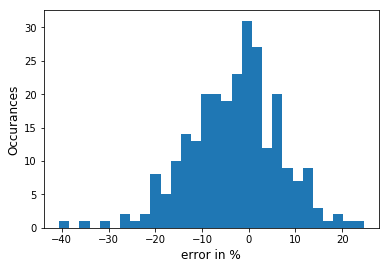

In [153]:
#plotting a histogram of the errors
hed = dumb_model['dumb_errors'].plot.hist(bins=30)
hed.set_xlabel("error in %", fontsize=12)
hed.set_ylabel("Occurances", fontsize=12)

Text(0, 0.5, 'Erro in %')

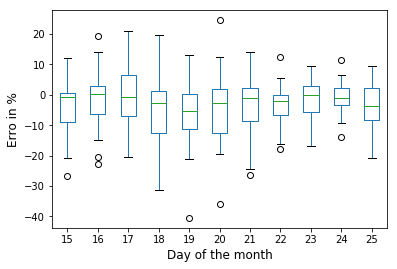

In [155]:
dumb_errors = dumb_model.pivot_table(values='dumb_errors', index='Date', columns='Day_int', aggfunc=np.sum)

dw = dumb_errors.plot.box()
dw.set_xlabel("Day of the month", fontsize=12)
dw.set_ylabel("Erro in %", fontsize=12)

In [156]:
dumb_errors.describe()

Day_int,15,16,17,18,19,20,21,22,23,24,25
count,28.000000,28.000000,26.000000,26.000000,27.000000,28.000000,27.000000,28.000000,27.000000,24.000000,22.000000
mean,-4.001729,-1.264273,-0.418818,-3.845258,-5.744273,-3.536372,-3.753284,-3.322508,-1.492969,-0.878670,-3.259446
std,9.180608,9.710465,10.560124,11.817480,11.332027,12.222617,9.517160,6.142314,6.774706,5.700093,7.344476
min,-26.667732,-22.934157,-20.463387,-31.253521,-40.555698,-35.985351,-26.272111,-17.860624,-16.800527,-13.915418,-20.698685
25%,-8.858152,-6.374450,-6.951749,-12.625529,-11.113275,-12.482852,-8.587246,-6.694499,-5.692538,-3.470173,-8.282394
50%,-0.619083,0.212045,-0.704940,-2.739765,-5.222538,-2.795892,-1.064574,-2.189921,-0.203540,-0.968924,-3.607187
75%,0.690845,3.029511,6.399949,1.360105,0.344566,1.853585,2.137469,0.000000,2.814243,2.313218,2.083345
max,12.053366,19.333682,20.889795,19.858435,13.158285,24.564167,14.214803,12.291036,9.448379,11.388425,9.594654


We can see that the model is reall bad on its predictions although it does improve a little bit as the days of the month advance (as expected).

Building models that learn.

In this first model, we are goint to use information that is going on within the month that we are predicting to predict the rest of the month.

Variables that I will use for this model to learn:
- LO
- Sales up to that day
- How many Mondays, Tuesdays, etc have been in the month and how many there are left

In [189]:
l_m1 = all_data[['Date', 'Day_str', 'Holiday_is_0']]
l_m1 = l_m1.pivot_table(values='Holiday_is_0', index='Date', columns='Day_str', aggfunc=np.sum).fillna(0).reset_index()
l_m1.head()

Day_str,Date,Friday,Monday,Thursday,Tuesday,Wednesday
0,2015-01-02,1.0,0.0,0.0,0.0,0.0
1,2015-01-05,0.0,1.0,0.0,0.0,0.0
2,2015-01-06,0.0,0.0,0.0,1.0,0.0
3,2015-01-07,0.0,0.0,0.0,0.0,1.0
4,2015-01-08,0.0,0.0,1.0,0.0,0.0


In [190]:
l_m1 = pd.merge(l_m1, all_data[['Date', 'Holiday_is_0', 'Daily Sales']], on='Date', how='outer').set_index('Date')
l_m1.head()

,Friday,Monday,Thursday,Tuesday,Wednesday,Holiday_is_0,Daily Sales
Date,,,,,,,
2015-01-02,1.0,0.0,0.0,0.0,0.0,1,30785.22
2015-01-05,0.0,1.0,0.0,0.0,0.0,1,18256.02
2015-01-06,0.0,0.0,0.0,1.0,0.0,1,24168.04
2015-01-07,0.0,0.0,0.0,0.0,1.0,1,3858.65
2015-01-08,0.0,0.0,1.0,0.0,0.0,1,0.00


In [191]:
#making a cummulative sum of the variables
l_m1 = l_m1.groupby(l_m1.index.to_period('m')).cumsum().reset_index()
l_m1.head()

,Date,Friday,Monday,Thursday,Tuesday,Wednesday,Holiday_is_0,Daily Sales
0,2015-01-02,1.0,0.0,0.0,0.0,0.0,1,30785.22
1,2015-01-05,1.0,1.0,0.0,0.0,0.0,2,49041.24
2,2015-01-06,1.0,1.0,0.0,1.0,0.0,3,73209.28
3,2015-01-07,1.0,1.0,0.0,1.0,1.0,4,77067.93
4,2015-01-08,1.0,1.0,1.0,1.0,1.0,5,77067.93


In [192]:
l_m1 = pd.merge(l_m1, all_data[['Date','#Mon', '#Tue', '#Wed', '#Thu', '#Fri', 'LO', 'Actual']], on='Date', how='outer')

In [193]:
l_m1.head()

,Date,Friday,Monday,Thursday,Tuesday,Wednesday,Holiday_is_0,Daily Sales,#Mon,#Tue,#Wed,#Thu,#Fri,LO,Actual
0,2015-01-02,1.0,0.0,0.0,0.0,0.0,1,30785.22,4,4,4,5,5,224175.6,224134.6
1,2015-01-05,1.0,1.0,0.0,0.0,0.0,2,49041.24,4,4,4,5,5,224175.6,224134.6
2,2015-01-06,1.0,1.0,0.0,1.0,0.0,3,73209.28,4,4,4,5,5,224175.6,224134.6
3,2015-01-07,1.0,1.0,0.0,1.0,1.0,4,77067.93,4,4,4,5,5,224175.6,224134.6
4,2015-01-08,1.0,1.0,1.0,1.0,1.0,5,77067.93,4,4,4,5,5,224175.6,224134.6


In [195]:
l_m1['mondays_left'] = l_m1['#Mon'] - l_m1['Monday']
l_m1['tuesdays_left'] = l_m1['#Tue'] - l_m1['Tuesday']
l_m1['wednesdays_left'] = l_m1['#Wed'] - l_m1['Wednesday']
l_m1['thursdays_left'] = l_m1['#Thu'] - l_m1['Thursday']
l_m1['fridays_left'] = l_m1['#Fri'] - l_m1['Friday']

In [202]:
#deleting columns that add colineality
cols_colineality = ['Holiday_is_0', '#Mon', '#Tue', '#Wed', '#Thu', '#Fri']
l_m1.drop(cols_colineality, axis=1, inplace=True)

In [203]:
l_m1.columns

Index(['Date', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
       'Daily Sales', 'LO', 'Actual', 'mondays_left', 'tuesdays_left',
       'wednesdays_left', 'thursdays_left', 'fridays_left'],
      dtype='object')

In [204]:
l_m1.head(15)

,Date,Friday,Monday,Thursday,Tuesday,Wednesday,Daily Sales,LO,Actual,mondays_left,tuesdays_left,wednesdays_left,thursdays_left,fridays_left
0,2015-01-02,1.0,0.0,0.0,0.0,0.0,30785.22,224175.6,224134.6,4.0,4.0,4.0,5.0,4.0
1,2015-01-05,1.0,1.0,0.0,0.0,0.0,49041.24,224175.6,224134.6,3.0,4.0,4.0,5.0,4.0
2,2015-01-06,1.0,1.0,0.0,1.0,0.0,73209.28,224175.6,224134.6,3.0,3.0,4.0,5.0,4.0
3,2015-01-07,1.0,1.0,0.0,1.0,1.0,77067.93,224175.6,224134.6,3.0,3.0,3.0,5.0,4.0
4,2015-01-08,1.0,1.0,1.0,1.0,1.0,77067.93,224175.6,224134.6,3.0,3.0,3.0,4.0,4.0
5,2015-01-09,2.0,1.0,1.0,1.0,1.0,77067.93,224175.6,224134.6,3.0,3.0,3.0,4.0,3.0
6,2015-01-12,2.0,2.0,1.0,1.0,1.0,78297.26,224175.6,224134.6,2.0,3.0,3.0,4.0,3.0
7,2015-01-13,2.0,2.0,1.0,2.0,1.0,120370.39,224175.6,224134.6,2.0,2.0,3.0,4.0,3.0
8,2015-01-14,2.0,2.0,1.0,2.0,2.0,127143.99,224175.6,224134.6,2.0,2.0,2.0,4.0,3.0
9,2015-01-15,2.0,2.0,2.0,2.0,2.0,127152.35,224175.6,224134.6,2.0,2.0,2.0,3.0,3.0


In [171]:
all_data.columns

Index(['str_month_year', 'Date', 'Month-Year_x', 'Day_str', 'Year_x',
       'Month_int', 'Month_str', 'Day_int', 'Holiday_is_0', 'month_year_x',
       'day_month_year', 'Country', 'Brand', 'Daily Sales', 'Month-Year_y',
       '#Mon', '#Tue', '#Wed', '#Thu', '#Fri', '#Sat', '#Sun',
       'Total Weekdays', 'working_days', 'month_year', 'Year_y', 'Month',
       'Actual', 'LO'],
      dtype='object')

In [ ]:
#making a df with the values that we are going to need to accumulate
dumb_model = all_data[['Date', 'Daily Sales', 'Holiday_is_0']].set_index('Date')
dumb_model.head()

In [ ]:
#making a cummulative sum of the variables
dumb_model = dumb_model.groupby(dumb_model.index.to_period('m')).cumsum().reset_index()
dumb_model.tail()